In [1]:
#! pip install pydub
#! pip install noisereduce

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.lite as tflite
from tensorflow.keras import layers
from tensorflow.keras import models

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

#Import for the dataset
#import opendatasets as od

import os
#import tensorflow_model_optimization as tfmot


from pydub import AudioSegment
import noisereduce as nr


import librosa
from scipy.io import wavfile
import soundfile as sf
import wave

import wave
import contextlib

from librosa import load
from librosa.util import fix_length

#import argparse

C:\Users\joana\anaconda3\envs\p3_7_11\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
#od.download("https://www.kaggle.com/fabianavinci/guitar-chords-v2")

In [4]:
############################## Parameters ##############################
# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

freq=44100

In [5]:
############################## Dataset ##############################
dataset_version=3

#Dataset with all the versions execpt the 3rd
#data_dir= 'guitar-chords-v3-N3'

# Test doesn't have noise reduction
#data_dir= 'guitar-chords-v3-44100-NoNoise' 

# No noise reduc everything at 44100
data_dir = 'guitar-chords-v3_44100'

# Noise redution in the training
#data_dir= 'guitar-chords-v3-1600-NoNoiseTest'

# Test and training at 44100
# data_dir= 'guitar-chords-v3-44100'

# Folder with all the recording and no noise reduction- 1600 and Mono + Padded 8 sec total
#data_dir= 'guitar-chords-v3_Mono_1600'

# All at 44100 and application of noise reduction
# data_dir= 'guitar-chords-v3_44100_NoiseRduction'

'''
#!!!!!! When we have the right datase we change it to the code at the end
zip_path = tf.keras.utils.get_file(
        origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
        fname='mini_speech_commands.zip',
        extract=True,
        cache_dir='.', cache_subdir='data')
'''


############################ Labels for the dataset ############################
chords = np.array(tf.io.gfile.listdir(str(data_dir+ '/Training/')))
chords = chords[chords != 'README.md']
print('Chords:', chords)


Chords: ['Am' 'Bb' 'Bdim' 'C' 'Dm' 'Em' 'F' 'G']


In [6]:
########################### MAX DURATION OF AUDIOS  ############################
'''max_duration=0 
set_type= "Training"
for i in chords:
    directory=str(f'{data_dir}/{set_type}/{i}/')
    for file in os.listdir(directory):               
        audio, sampling_rate = librosa.load(f'{directory}/{file}', sr=freq, mono=True)
        duration=librosa.get_duration(y=audio, sr=freq)
        if duration> max_duration:
            max_duration= duration
        
print(f"Audio duration: {max_duration}")
'''

'max_duration=0 \nset_type= "Training"\nfor i in chords:\n    directory=str(f\'{data_dir}/{set_type}/{i}/\')\n    for file in os.listdir(directory):               \n        audio, sampling_rate = librosa.load(f\'{directory}/{file}\', sr=freq, mono=True)\n        duration=librosa.get_duration(y=audio, sr=freq)\n        if duration> max_duration:\n            max_duration= duration\n        \nprint(f"Audio duration: {max_duration}")\n'

In [7]:
'''#put all together with the below function

sf = freq # sampling frequency of wav file
#required_audio_size = round(max_duration)# audio of size 2 second needs to be padded to 8 seconds
required_audio_size = 8
print(f'Required audio size: {required_audio_size}' )

max_shape=0
print(f'Data set version: {dataset_version}')
set_type="Training"
for i in chords:
    # Directory: Original dataset without transformations 
    directory=str(f'{data_dir}/{set_type}/{i}/')

    #folder= i 

    for file in os.listdir(directory):       

        audio, sampling_rate = librosa.load(f'{directory}/{file}', sr=freq, mono=True)
        # perform noise reduction
        reduced_noise = nr.reduce_noise(y=audio, sr=sampling_rate)
        
        #print("Audio tipo", audio.shape)
        shape_audio=reduced_noise.shape
        #padded_audio = fix_length(audio, size=8*sf) # array size is required_audio_size*sampling frequency

        if shape_audio[0]> max_shape:
            max_shape= shape_audio[0]
            
        #new_file = wave.open(audio,'wb')
        #sf.write(directory+ f"{file}",  reduced_noise, sampling_rate)

print(f"MAX AUDIO SHAPE = {max_shape}  ")
print(f"Audio transformations: Frequency - {freq}     Folder -  {set_type}    Path -{directory}  ")
'''

'#put all together with the below function\n\nsf = freq # sampling frequency of wav file\n#required_audio_size = round(max_duration)# audio of size 2 second needs to be padded to 8 seconds\nrequired_audio_size = 8\nprint(f\'Required audio size: {required_audio_size}\' )\n\nmax_shape=0\nprint(f\'Data set version: {dataset_version}\')\nset_type="Training"\nfor i in chords:\n    # Directory: Original dataset without transformations \n    directory=str(f\'{data_dir}/{set_type}/{i}/\')\n\n    #folder= i \n\n    for file in os.listdir(directory):       \n\n        audio, sampling_rate = librosa.load(f\'{directory}/{file}\', sr=freq, mono=True)\n        # perform noise reduction\n        reduced_noise = nr.reduce_noise(y=audio, sr=sampling_rate)\n        \n        #print("Audio tipo", audio.shape)\n        shape_audio=reduced_noise.shape\n        #padded_audio = fix_length(audio, size=8*sf) # array size is required_audio_size*sampling frequency\n\n        if shape_audio[0]> max_shape:\n      

In [8]:
def transform_origianl_samples(chords, set_type, freq, dataset_version, data_dir):
    #sf = freq # sampling frequency of wav file
    #required_audio_size = round(max_duration)# audio of size 2 second needs to be padded to 8 seconds
    required_audio_size = 8
    print(f'Required audio size: {required_audio_size}' )

    max_shape=0
    print(f'Data set version: {dataset_version}')
    set_type="Training"
    for i in chords:
    # Directory: Original dataset without transformations 
        directory=str(f'{data_dir}/{set_type}/{i}/')

        #folder= i 

        for file in os.listdir(directory):       

            audio, sampling_rate = librosa.load(f'{directory}/{file}', sr=freq, mono=True)
            # perform noise reduction
            #reduced_noise = nr.reduce_noise(y=audio, sr=sampling_rate)
            #print(type(reduced_noise))
            #print("Audio tipo", audio.shape)
            shape_audio=audio.shape
            #padded_audio = fix_length(audio, size=8*sf) # array size is required_audio_size*sampling frequency

            if shape_audio[0]> max_shape:
                max_shape= shape_audio[0]

            #new_file = wave.open(audio,'wb')
            sf.write(directory+ f"{file}",  audio, sampling_rate)
    
    return max_shape

    print(f"Audio transformations: Frequency - {freq}     Folder -  {set_type}    Path -{directory}  ")
    print(f"MAX AUDIO SHAPE = {max_shape}  ")



In [9]:
print(freq)
print(data_dir)


44100
guitar-chords-v3_44100


In [10]:
set_type="Training"
max_shape = transform_origianl_samples(chords, set_type, freq, dataset_version, data_dir )
set_type="Test"
#transform_origianl_samples(chords, set_type, freq, dataset_version, data_dir )


Required audio size: 8
Data set version: 3


In [11]:
transform_origianl_samples(chords, set_type, freq, dataset_version, data_dir )

Required audio size: 8
Data set version: 3


720765

In [12]:
############################ Dataset split ############################
def split_dataset(set_type, chords, data_dir):

    filenames=  tf.io.gfile.glob(str(data_dir) + f'/{set_type}/*/*')

    if set_type=="Training":
        filenames=tf.random.shuffle(filenames)

    filenames_samples=len(filenames)
    print(f"########################## {set_type} information ##############################")
    print(f'{set_type} - Number of total examples:', filenames_samples)
    print(f'{set_type} - Number of examples per label:',
        len(tf.io.gfile.listdir(str(data_dir+ f'/{set_type}/'+ chords[0]))))
    print(f'{set_type} - Example file tensor:', filenames[1])
    
    return filenames,filenames_samples

In [13]:
############################ Training ############################
set_type="Training"
training_filenames,train_num_samples = split_dataset(set_type, chords, data_dir )

############################ Test ############################
set_type="Test"
test_filenames, _ = split_dataset(set_type, chords, data_dir )

########################## Training information ##############################
Training - Number of total examples: 1447
Training - Number of examples per label: 180
Training - Example file tensor: tf.Tensor(b'guitar-chords-v3_44100\\Training\\Dm\\Dm_acousticguitar_SAndrade_1.wav', shape=(), dtype=string)
########################## Test information ##############################
Test - Number of total examples: 320
Test - Number of examples per label: 40
Test - Example file tensor: guitar-chords-v3_44100\Test\F\F_AcusticPlug26_2.wav


In [14]:
############################ Validation set ############################
val_filenames = training_filenames[int(train_num_samples*0.9):]
len_val=len(val_filenames)
print("########################## Validation information ##############################")
print('Validation - Number of total examples:',len_val )

########################## Validation information ##############################
Validation - Number of total examples: 145


In [15]:
class SignalGenerator:
    def __init__(self, labels, sampling_rate, frame_length, frame_step, max_shape, batch_size,
            num_mel_bins=None, lower_frequency=None, upper_frequency=None,
            num_coefficients=None, mfcc=False,plot=False):
        self.labels = labels
        self.sampling_rate = sampling_rate
        self.frame_length = frame_length
        self.frame_step = frame_step
        self.num_mel_bins = num_mel_bins
        self.lower_frequency = lower_frequency
        self.upper_frequency = upper_frequency
        self.num_coefficients = num_coefficients
        num_spectrogram_bins = (frame_length) // 2 + 1
        self.plot=plot
        self.max_shape=max_shape
        self.batch_size=batch_size

        if mfcc is True:
            self.linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
                    self.num_mel_bins, num_spectrogram_bins, self.sampling_rate,
                    self.lower_frequency, self.upper_frequency)
            self.preprocess = self.preprocess_with_mfcc
        else:
            self.preprocess = self.preprocess_with_stft

    def read(self, file_path):
        parts = tf.strings.split(file_path, os.path.sep)
        label = parts[-2]
        print(f"Parts:{parts}")
        label_id = tf.argmax(label == self.labels)
        audio_binary = tf.io.read_file(file_path)
        audio, _ = tf.audio.decode_wav(audio_binary)
        audio = tf.squeeze(audio, axis=1)
        
        return audio, label_id

       
    def pad(self, audio):
        #print(self.sampling_rate)
        input_len = max_shape
        audio = audio[:input_len]
        print(f"Tfshape {tf.shape(audio)}")
        zero_padding = tf.zeros( self.max_shape - tf.shape(audio), dtype=tf.float32)
        audio = tf.concat([audio, zero_padding], 0)
        audio.set_shape([max_shape])

        return audio

    def get_spectrogram(self, audio):
        stft = tf.signal.stft(audio, frame_length=self.frame_length,
                frame_step=self.frame_step, fft_length=self.frame_length)
        spectrogram = tf.abs(stft)

        return spectrogram

    def get_mfccs(self, spectrogram):
        mel_spectrogram = tf.tensordot(spectrogram,
                self.linear_to_mel_weight_matrix, 1)
        log_mel_spectrogram = tf.math.log(mel_spectrogram + 1.e-6)
        mfccs = tf.signal.mfccs_from_log_mel_spectrograms(log_mel_spectrogram)
        mfccs = mfccs[..., :self.num_coefficients]

        return mfccs

    def preprocess_with_stft(self, file_path, plot):
        print(plot)
        audio, label = self.read(file_path)
        audio = self.pad(audio)
        spectrogram = self.get_spectrogram(audio)
        spectrogram = tf.expand_dims(spectrogram, -1)
        
        if plot == False:
            spectrogram = tf.image.resize(spectrogram, [32, 32])

        return spectrogram, label

    def preprocess_with_mfcc(self, file_path):
        audio, label = self.read(file_path)
        audio = self.pad(audio)
        spectrogram = self.get_spectrogram(audio)
        mfccs = self.get_mfccs(spectrogram)
        mfccs = tf.expand_dims(mfccs, -1)

        return mfccs, label

    def make_dataset(self, files, train,batch_size):
        ds = tf.data.Dataset.from_tensor_slices(files)
        ds = ds.map(self.preprocess, num_parallel_calls=4)
        ds = ds.batch(batch_size)
        ds = ds.cache()
        if train is True:
            ds = ds.shuffle(100, reshuffle_each_iteration=True)

        return ds
    
    def read_waveform(self, file_path ):
        parts = tf.strings.split(file_path, os.path.sep)
        label = parts[-2]
        print(f"Parts:{parts}")
        label_id = tf.argmax(label == self.labels)
        audio_binary = tf.io.read_file(file_path)
        audio, _ = tf.audio.decode_wav(audio_binary)
        #audio = tf.squeeze(audio, axis=1)
        
        return audio, label
    
    #Function to get the spectogram
    def get_spectrogram_waveform(self, waveform):
        # Zero-padding for an audio waveform with less than 16,000 samples.
        ############# TRY a different input len ############################
        #input_len = freq
        #waveform = waveform[:input_len]
        zero_padding = tf.zeros(
                      [self.sampling_rate] - tf.shape(waveform), dtype=tf.float32)
        # Cast the waveform tensors' dtype to float32.
        waveform = tf.cast(waveform, dtype=tf.float32)
        # Concatenate the waveform with `zero_padding`, which ensures all audio
        # clips are of the same length.
        equal_length = tf.concat([waveform, zero_padding], 0)
        waveform=waveform.set_shape([self.sampling_rate])
        
        # Convert the waveform to a spectrogram via a STFT.
        spectrogram = tf.signal.stft(
          equal_length, self.frame_length, self.frame_step)
        # Obtain the magnitude of the STFT.
        spectrogram = tf.abs(spectrogram)

        # Add a `channels` dimension, so that the spectrogram can be used
        # as image-like input data with convolution layers (which expect
        # shape (`batch_size`, `height`, `width`, `channels`).
        #spectrogram = spectrogram[..., tf.newaxis]
        return spectrogram 

    

In [16]:
STFT_OPTIONS = {'frame_length': 256, 'frame_step': 128, 'mfcc': False , 'max_shape': max_shape }
MFCC_OPTIONS = {'frame_length': 640, 'frame_step': 320, 'mfcc': True,
        'lower_frequency': 20, 'upper_frequency': 4000, 'num_mel_bins': 40,
        'num_coefficients': 10, 'max_shape': max_shape }
mfcc=True

if mfcc is True:
    options = MFCC_OPTIONS
    strides = [2, 1]
else:
    options = STFT_OPTIONS
    strides = [2, 2]
    
    
generator = SignalGenerator(chords, freq,batch_size=32, **options)
train_ds = generator.make_dataset(training_filenames, True,batch_size=32)
val_ds = generator.make_dataset(val_filenames, False ,batch_size=32)
test_ds = generator.make_dataset(test_filenames, False,batch_size=32)





Parts:Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)
Tfshape Tensor("Shape:0", shape=(1,), dtype=int32)
Parts:Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)
Tfshape Tensor("Shape:0", shape=(1,), dtype=int32)
Parts:Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)
Tfshape Tensor("Shape:0", shape=(1,), dtype=int32)


In [17]:
#For a better performance and OPTIMIZATION
AUTOTUNE = tf.data.AUTOTUNE #Optimize the number of parellel calls

train_files_ds = tf.data.Dataset.from_tensor_slices(training_filenames)
train_waveform_ds = train_files_ds.map(
    map_func=generator.read_waveform,
    num_parallel_calls=AUTOTUNE)



Parts:Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)


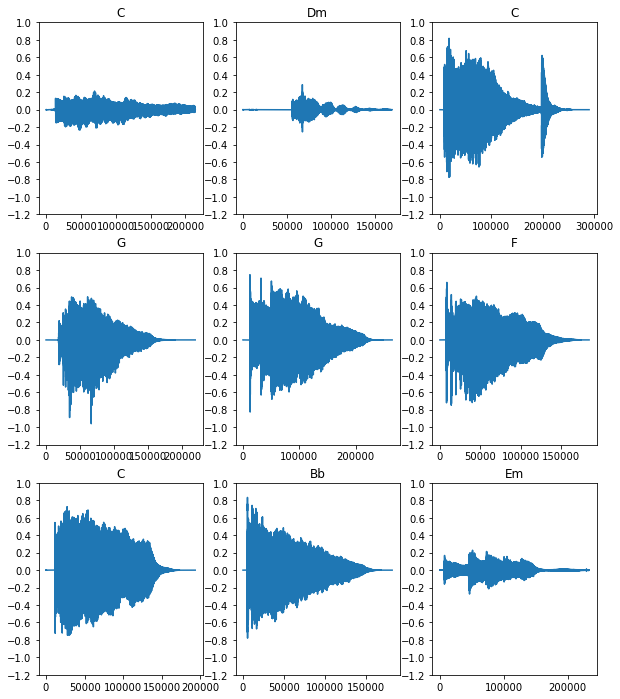

In [18]:
############################ Data exploration ############################

rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(train_waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio.numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label.numpy().decode('utf-8')
    ax.set_title(label)

plt.show()

In [19]:
#Visualization of the spectogram
def plot_spectrogram(spectrogram, ax):
    if len(spectrogram.shape) > 2:
        assert len(spectrogram.shape) == 3
        spectrogram = np.squeeze(spectrogram, axis=-1)
    # Convert the frequencies to log scale and transpose, so that the time is
    # represented on the x-axis (columns).
    # Add an epsilon to avoid taking a log of zero.
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    print("height", height)
    print("width", width)

    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)

In [20]:
#STFT
for waveform, label in train_waveform_ds.take(1):
    label = label.numpy().decode('utf-8')
    spectrogram,_ = generator.preprocess_with_stft(training_filenames[0],plot=True)


True
Parts:[b'guitar-chords-v3_44100' b'Training' b'C' b'C_electric_Isabel_4.wav']
Tfshape [214021]


In [21]:
print(training_filenames[0].numpy())
spectrogram,_ = generator.preprocess_with_stft(training_filenames[0],plot=True)


b'guitar-chords-v3_44100\\Training\\C\\C_electric_Isabel_4.wav'
True
Parts:[b'guitar-chords-v3_44100' b'Training' b'C' b'C_electric_Isabel_4.wav']
Tfshape [214021]


height 321
width 2251


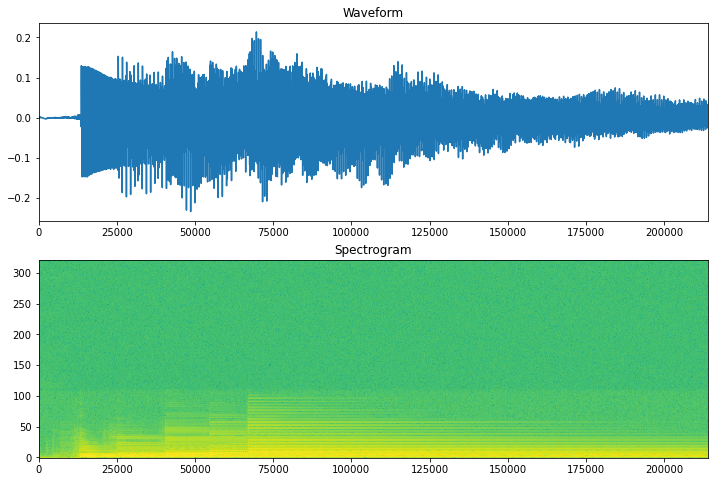

In [22]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, len(waveform)  ])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
axes[1].set_xlim([0,len(waveform)])
plt.show()

In [23]:
############################ Parameters for the Model ############################

input_shape = spectrogram.shape
output_shape = len(chords)
input_shape=(2251, 10, 1)
print(input_shape)

(2251, 10, 1)


In [24]:
############################ MODEL ############################
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=input_shape, filters=128, kernel_size=[3,3], strides=strides, use_bias=False),
    tf.keras.layers.BatchNormalization(momentum=0.1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(input_shape=input_shape, filters=128, kernel_size=[3,3], strides=[1,1], use_bias=False),
    tf.keras.layers.BatchNormalization(momentum=0.1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(input_shape=input_shape, filters=128, kernel_size=[3,3], strides=[1,1], use_bias=False),
    tf.keras.layers.BatchNormalization(momentum=0.1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units = 8)
])

dcnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=input_shape, filters=256, kernel_size=[3,3], strides=strides, use_bias=False),
    tf.keras.layers.BatchNormalization(momentum=0.1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.DepthwiseConv2D(kernel_size=[3, 3], strides=[1, 1], use_bias=False),
    tf.keras.layers.Conv2D(filters=128, kernel_size=[1,1], strides=[1,1], use_bias=False),
    tf.keras.layers.BatchNormalization(momentum=0.1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.DepthwiseConv2D(kernel_size=[3, 3], strides=[1, 1], use_bias=False),
    tf.keras.layers.Conv2D(filters=64, kernel_size=[1,1], strides=[1,1], use_bias=False),
    tf.keras.layers.BatchNormalization(momentum=0.1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units = 8)
])

In [25]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.optimizers.Adam()
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

In [26]:
model=cnn
model.compile(loss = loss, optimizer = optimizer, metrics = metrics)



history= model.fit(train_ds, validation_data=val_ds, epochs=50)
                   #callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2))

model.summary()

Epoch 1/50
46/46 [==============================] - 258s 2s/step - loss: 1.9676 - sparse_categorical_accuracy: 0.2709 - val_loss: 1.8431 - val_sparse_categorical_accuracy: 0.3103
Epoch 2/50
46/46 [==============================] - 76s 2s/step - loss: 1.7004 - sparse_categorical_accuracy: 0.4457 - val_loss: 1.6819 - val_sparse_categorical_accuracy: 0.3931
Epoch 3/50
46/46 [==============================] - 77s 2s/step - loss: 1.5653 - sparse_categorical_accuracy: 0.5245 - val_loss: 1.5507 - val_sparse_categorical_accuracy: 0.5034
Epoch 4/50
46/46 [==============================] - 78s 2s/step - loss: 1.4807 - sparse_categorical_accuracy: 0.5577 - val_loss: 1.5297 - val_sparse_categorical_accuracy: 0.5172
Epoch 5/50
46/46 [==============================] - 80s 2s/step - loss: 1.4146 - sparse_categorical_accuracy: 0.5833 - val_loss: 1.4130 - val_sparse_categorical_accuracy: 0.5310
Epoch 6/50
46/46 [==============================] - 85s 2s/step - loss: 1.3514 - sparse_categorical_accuracy:

Epoch 47/50
46/46 [==============================] - 82s 2s/step - loss: 0.1995 - sparse_categorical_accuracy: 0.9599 - val_loss: 0.3150 - val_sparse_categorical_accuracy: 0.9172
Epoch 48/50
46/46 [==============================] - 84s 2s/step - loss: 0.2068 - sparse_categorical_accuracy: 0.9537 - val_loss: 0.2945 - val_sparse_categorical_accuracy: 0.9103
Epoch 49/50
46/46 [==============================] - 85s 2s/step - loss: 0.2033 - sparse_categorical_accuracy: 0.9523 - val_loss: 0.2337 - val_sparse_categorical_accuracy: 0.9379
Epoch 50/50
46/46 [==============================] - 82s 2s/step - loss: 0.2034 - sparse_categorical_accuracy: 0.9585 - val_loss: 0.2200 - val_sparse_categorical_accuracy: 0.9517
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1125, 8, 128)      1152      
                                                                 


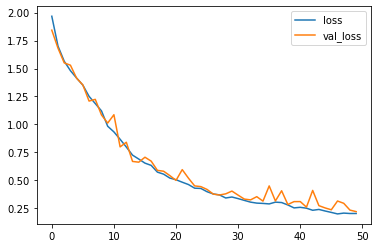

In [27]:
#PLOT loss metric to evaluate
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

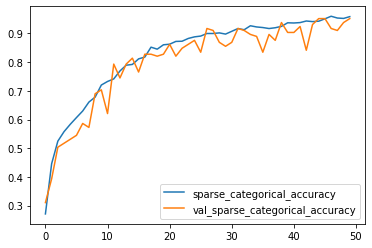

In [28]:
metrics = history.history
plt.plot(history.epoch, metrics['sparse_categorical_accuracy'], metrics['val_sparse_categorical_accuracy'])
plt.legend(['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'])
plt.show()

In [29]:
model.evaluate(test_ds)

10/10 [==============================] - 46s 4s/step - loss: 0.6168 - sparse_categorical_accuracy: 0.8469


[0.6168045997619629, 0.846875011920929]

In [30]:
####################### CONFUSION MATRIX ##########################
test_audio = []
test_labels = []
#input_shape=(2251, 10, 1)
for audio, label in test_ds:
    #test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

#test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

#tensor_test_audio=tf.convert_to_tensor(test_audio)

y_pred = np.argmax(model.predict(test_ds), axis=1)
y_true = test_labels

print(y_true.shape)
y_true=y_true.reshape(320,)
print(y_true.shape)

print(f"Shape pred {y_pred.shape}")
print(f"Type {y_true}")
print(f"Type {y_pred}")

(10, 32)
(320,)
Shape pred (320,)
Type [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 2 3
 2 3 2 3 2 2 3 3 2 3 2 3 2 3 2 3 3 2 3 2 3 2 3 3 2 3 2 3 2 3 2 3 2 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Type [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 2 2 6 2 7 2 6 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 6 6 6 2 0 0 0 0 0 0
 0 0 1 0 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4
 1 4 4 4 4 2 2 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 2 5 5
 4 1 5

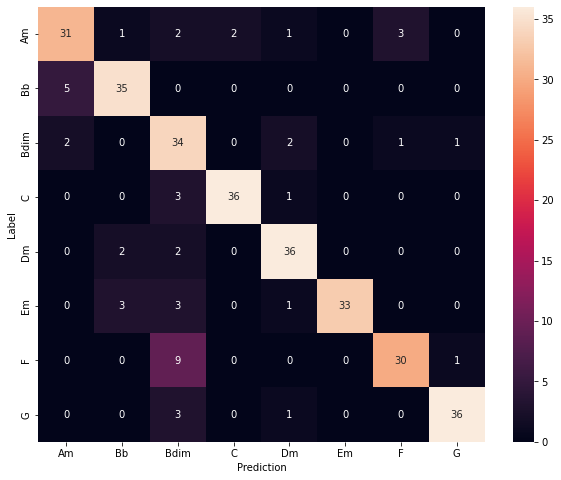

In [31]:
#Transformation to tensor - 1D 

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=chords,
            yticklabels=chords,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()